In [11]:
%%capture
!python -m pip install abraia

import os
if not os.getenv('ABRAIA_ID') and not os.getenv('ABRAIA_KEY'):
    #@markdown <a href="https://abraia.me/console/gallery" target="_blank">Upload and manage your images</a>
    abraia_id = ''  #@param {type: "string"}
    abraia_key = ''  #@param {type: "string"}
    %env ABRAIA_ID=$abraia_id
    %env ABRAIA_KEY=$abraia_key

from abraia import Abraia

multiple = Abraia()

In [12]:
# %%capture
# !wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
# !unzip hymenoptera_data.zip

In [13]:
import os
import tempfile
import numpy as np
import matplotlib.pyplot as plt
from abraia.torch import Dataset, imshow, create_model, train_model, visualize_model, save_model, save_classes

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader

import torchvision
from torchvision import models, transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [14]:
dataset = 'hymenoptera_data'

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: Dataset(os.path.join(dataset, x), data_transforms[x]) for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}

class_names = image_datasets['train'].classes

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


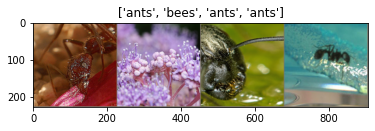

In [15]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [16]:
model_conv = create_model(class_names)
model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
model_ft = train_model(model_conv, dataloaders, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.8569 Acc: 0.6371
val Loss: 0.1799 Acc: 0.9539

Epoch 1/24
----------
train Loss: 0.6232 Acc: 0.7601
val Loss: 0.1722 Acc: 0.9362

Epoch 2/24
----------
train Loss: 0.6449 Acc: 0.7480
val Loss: 0.2341 Acc: 0.9184

Epoch 3/24
----------
train Loss: 0.5081 Acc: 0.8085
val Loss: 0.1498 Acc: 0.9574

Epoch 4/24
----------
train Loss: 0.6123 Acc: 0.7681
val Loss: 0.1507 Acc: 0.9433

Epoch 5/24
----------
train Loss: 0.5087 Acc: 0.7923
val Loss: 0.1720 Acc: 0.9326

Epoch 6/24
----------
train Loss: 0.4575 Acc: 0.8367
val Loss: 0.1397 Acc: 0.9504

Epoch 7/24
----------
train Loss: 0.4424 Acc: 0.8226
val Loss: 0.1698 Acc: 0.9326

Epoch 8/24
----------
train Loss: 0.4341 Acc: 0.8306
val Loss: 0.1561 Acc: 0.9504

Epoch 9/24
----------
train Loss: 0.4236 Acc: 0.8266
val Loss: 0.1540 Acc: 0.9397

Epoch 10/24
----------
train Loss: 0.4858 Acc: 0.8246
val Loss: 0.1629 Acc: 0.9397

Epoch 11/24
----------
train Loss: 0.4479 Acc: 0.8226
val Loss: 0.1809 Acc: 0.9326

Ep

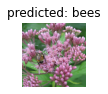

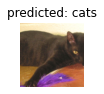

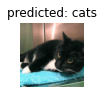

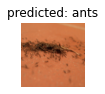

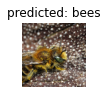

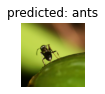

In [18]:
visualize_model(model_ft, dataloaders)

In [ ]:
save_model(os.path.join(dataset, 'model_ft.pt'), model_ft)
save_classes(os.path.join(dataset, 'model_ft.txt'), class_names)